In [4]:
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont

imagePath = "image.png"
ttfontname = "C:\\Windows\\Fonts\\meiryob.ttc"

def makeKanjiImage(text,fontsize=12,isVartical=True):
  
    margin = int(fontsize / 3)
    textLength = len(text)
    canvasSize = (fontsize,fontsize)
    if isVartical:
        canvasSize = (fontsize+margin,fontsize*textLength + margin)
    else:
        canvasSize = (fontsize*textLength +margin,fontsize +margin)
    backgroundRGB = (255, 255, 255)
    textRGB       = (0, 0, 0)
    img  = PIL.Image.new('RGB', canvasSize, backgroundRGB)
    draw = PIL.ImageDraw.Draw(img)
    font = PIL.ImageFont.truetype(ttfontname, fontsize)
    if isVartical:
        for i in range(textLength):
            topleft = (canvasSize[0]//2-fontsize//2,fontsize*i)
            draw.text(topleft, text[i], fill=textRGB, font=font)
    else:
        for i in range(textLength):
            topleft = (fontsize*i, canvasSize[1]//2-fontsize//2-margin//2)
            draw.text(topleft, text[i], fill=textRGB, font=font)
    img.save(imagePath)

In [5]:
makeKanjiImage(text="こんにちは",fontsize=100)

In [7]:
import numpy as np

im = PIL.Image.open(imagePath)
im = im.convert('L')
im.show()

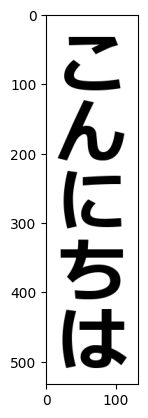

In [8]:
import matplotlib.pyplot as plt
plt.gray()
im_array = np.asarray(im)
plt.imshow(im_array)

In [10]:
import codecs

count = 0
def myWordOut(value:int,myword:str):
    mywordcount = len(myword)
    global count
    if value > 250:
        return " "
    else:
        if count == mywordcount:
            count = 0
        count += 1
        return myword[count-1]

for item in im_array:
    mystr = " ".join([myWordOut(i,myword="こんにちは") for i in item])
    print(mystr, file=codecs.open('output.txt', 'a', 'utf-8'))
